Dataset Information:

Boston House Prices Dataset was collected in 1978 and has 506 entries with 14 attributes or features for homes from various suburbs in Boston.

```
Boston Housing Dataset Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
```

Importing necessary Modules

In [1]:
#Importing neccessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import statsmodels.api as sm

Loading Dataset


In [2]:
df = pd.read_csv("D:/Data Sets/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
#statistical info
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Preprocessing the Dataset

In [5]:
#check for null values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
#df=df.fillna(df.median())

In [7]:
df=df[df.isna().any(axis=1)==False]

Exploratory Data Analysis

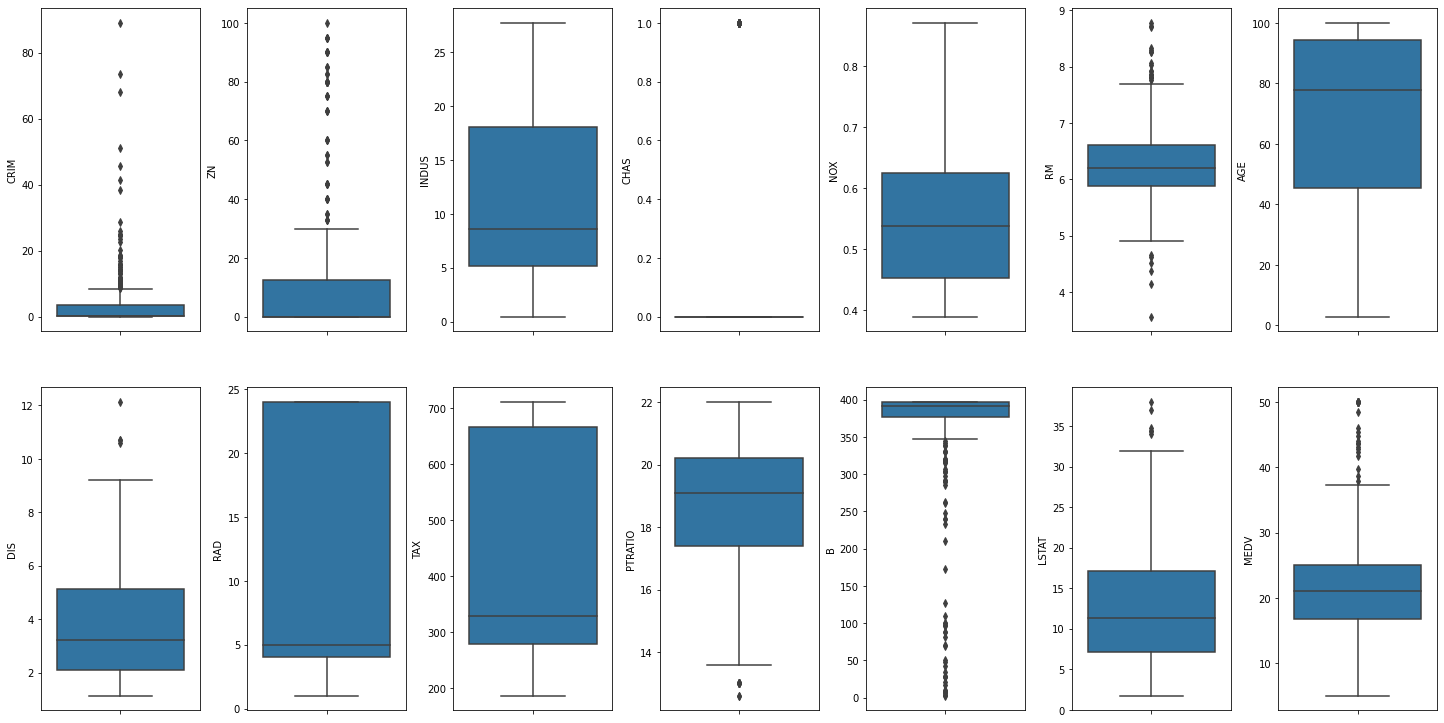

In [8]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()
for col,value in df.items():
  sns.boxplot(y = col,data = df, ax = ax[index])
  index+=1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad = 5.0)

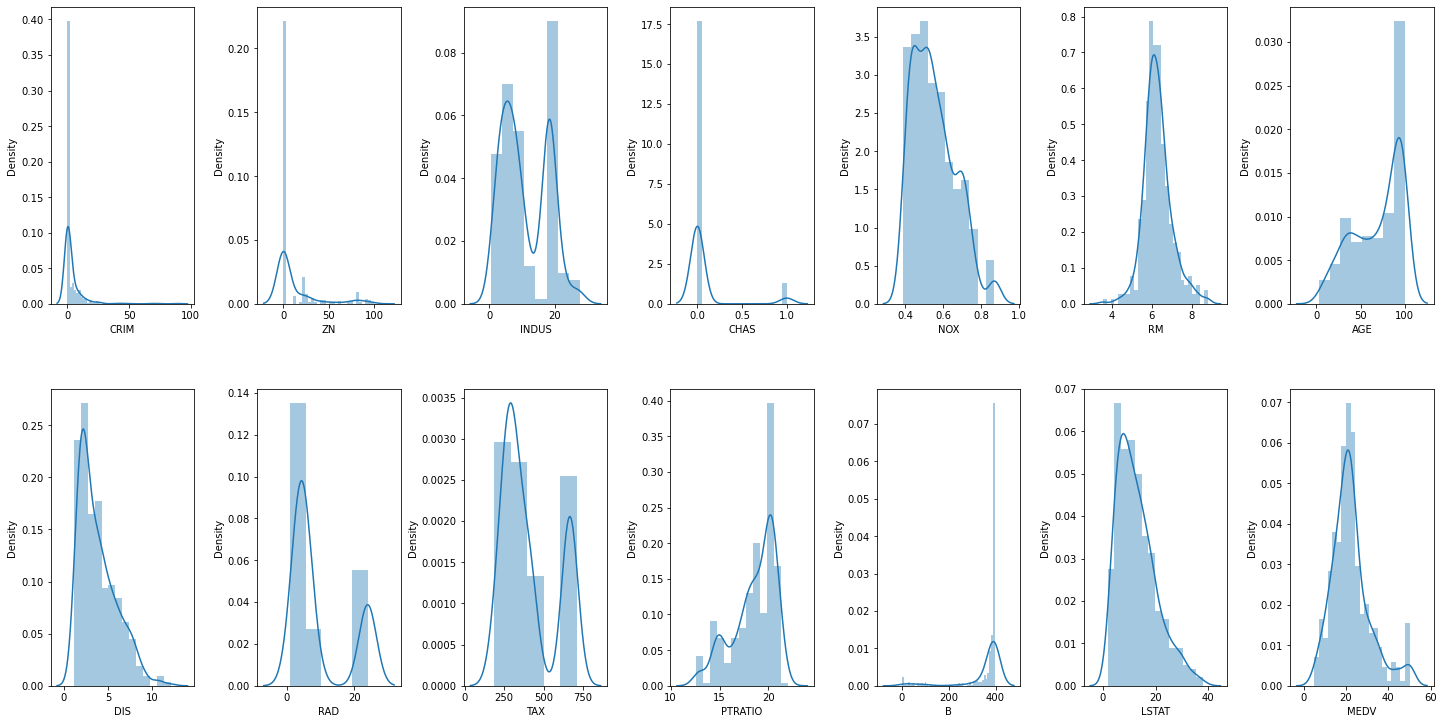

In [9]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()
for col,value in df.items():
  sns.distplot(value, ax = ax[index])
  index+=1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad = 5.0)

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Removing Outliers

In [11]:
def outliers(df,ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  ls = df.index[(df[ft]<lower_bound)| (df[ft]>upper_bound)]
  return ls

In [12]:
index_list = []
for feature in ['CRIM','ZN','RM','LSTAT','MEDV']:
  index_list.extend(outliers(df,feature))

In [13]:
def remove(df,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [14]:
df = remove(df,index_list)

In [15]:
df.shape

(268, 14)

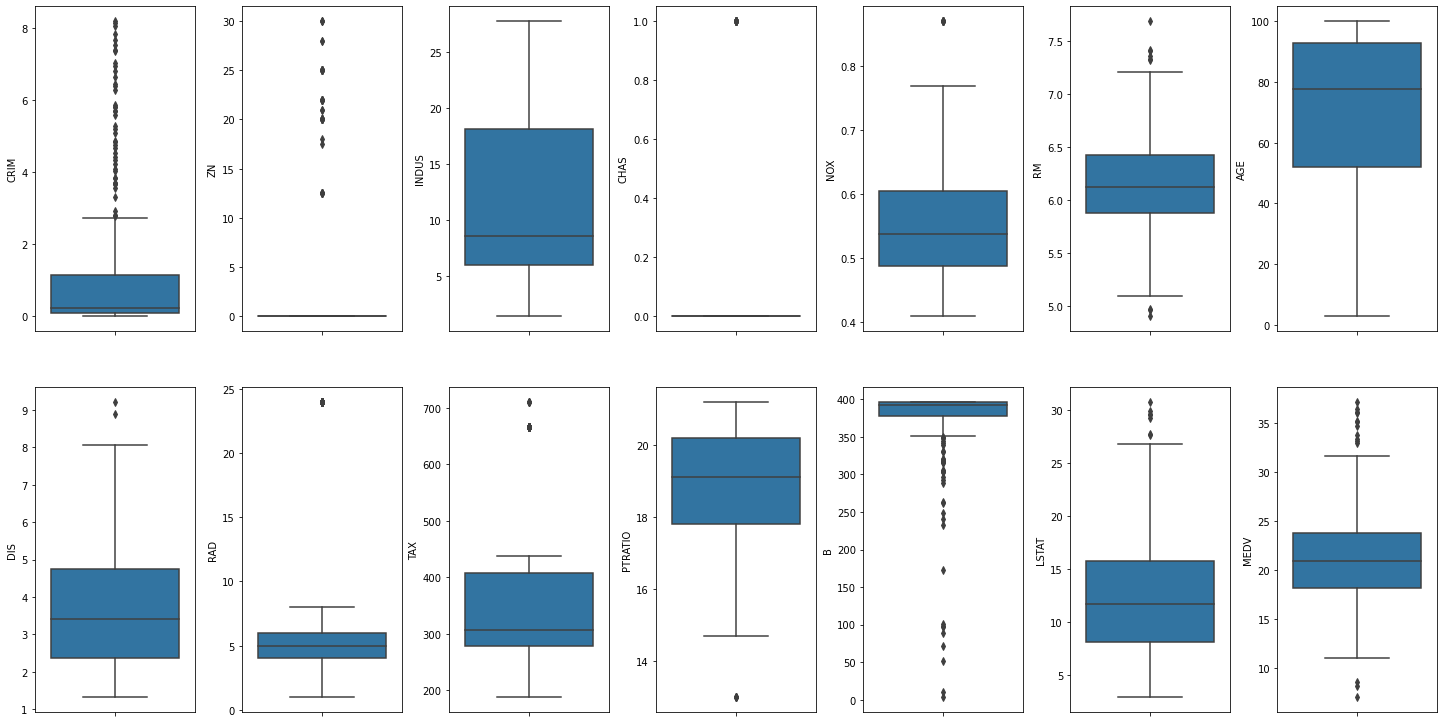

In [16]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()
for col,value in df.items():
  sns.boxplot(y = col,data = df, ax = ax[index])
  index+=1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad = 5.0)

In [17]:
ls = [df.columns]
ls


[Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT', 'MEDV'],
       dtype='object')]

Standardizing the Dataset

In [18]:
scaler = preprocessing.StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'])

In [19]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.609310,1.752757,-1.354861,-0.268328,-0.133042,0.899369,-0.190326,0.193593,-0.915417,-0.541376,-1.689591,0.410007,-1.348054,0.531022
1,-0.598953,-0.440861,-0.627608,-0.268328,-0.792266,0.565065,0.341647,0.699152,-0.776655,-0.904282,-0.451322,0.410007,-0.606033,0.074705
2,-0.598963,-0.440861,-0.627608,-0.268328,-0.792266,2.223559,-0.349529,0.699152,-0.776655,-0.904282,-0.451322,0.344699,-1.517506,2.565438
3,-0.596456,-0.440861,-1.374723,-0.268328,-0.897359,1.817618,-0.943630,1.330366,-0.637892,-1.038692,-0.005544,0.373582,-1.711929,2.318266
4,-0.597699,-0.440861,-1.374723,-0.268328,-0.897359,0.584602,-0.442722,1.330366,-0.637892,-1.038692,-0.005544,0.365398,-1.307029,1.424644


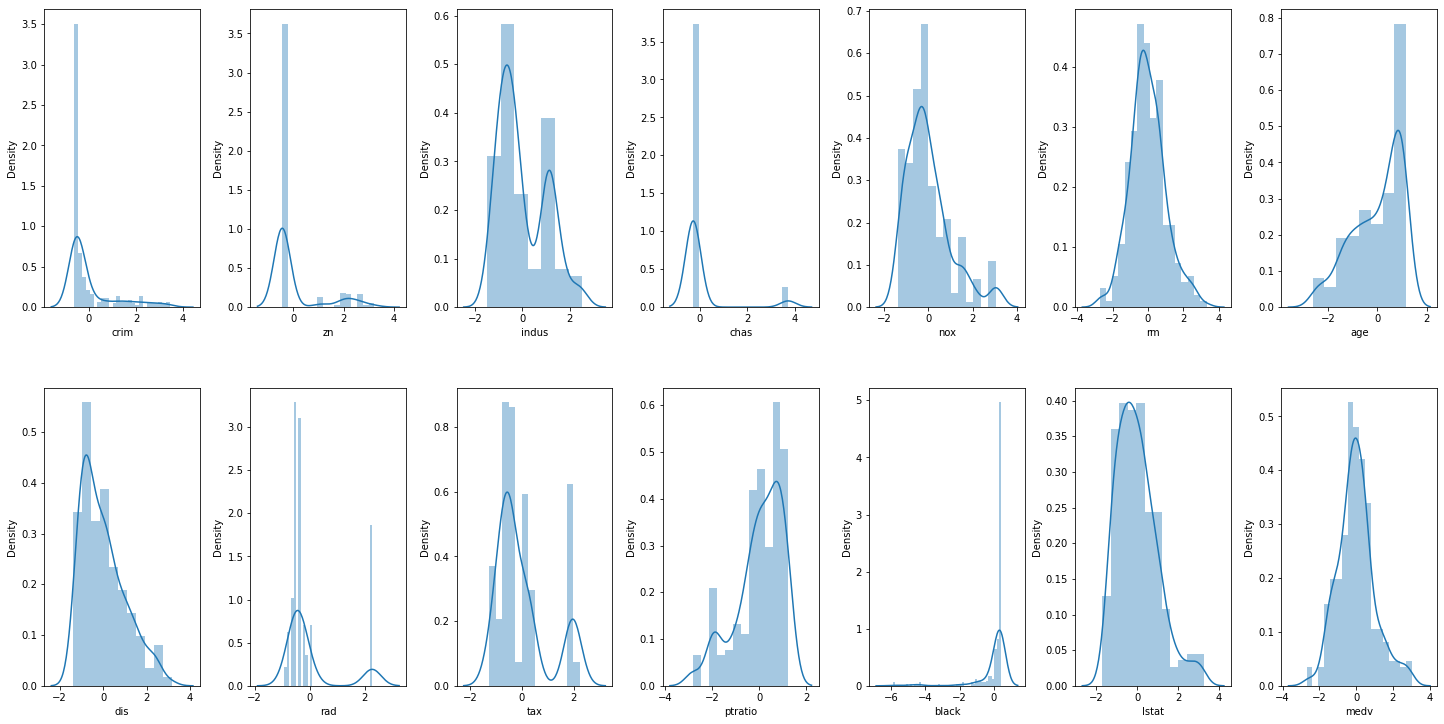

In [20]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()
for col,value in df.items():
  sns.distplot(value, ax = ax[index])
  index+=1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad = 5.0)

Checking multicollinearity

<AxesSubplot:>

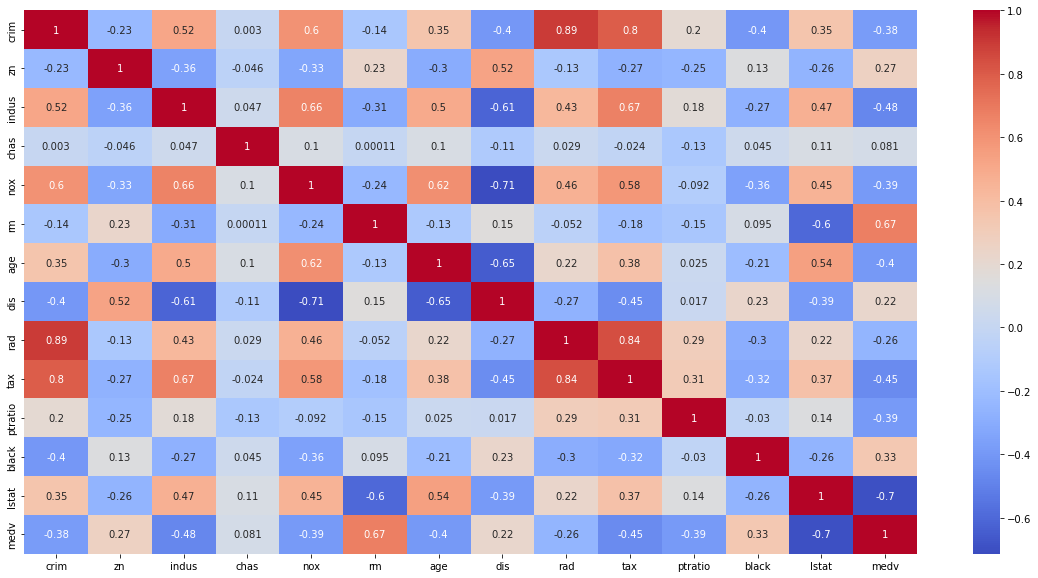

In [21]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')

We see 'tax' column is highly correlated with 'rad' & 'crim'. We will drop this column from our dataset to remove probelematic multicollinearity.

In [22]:
df.drop(columns = 'rad', inplace = True)

In [23]:
df.shape

(268, 13)

In [24]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat,medv
0,-0.609310,1.752757,-1.354861,-0.268328,-0.133042,0.899369,-0.190326,0.193593,-0.541376,-1.689591,0.410007,-1.348054,0.531022
1,-0.598953,-0.440861,-0.627608,-0.268328,-0.792266,0.565065,0.341647,0.699152,-0.904282,-0.451322,0.410007,-0.606033,0.074705
2,-0.598963,-0.440861,-0.627608,-0.268328,-0.792266,2.223559,-0.349529,0.699152,-0.904282,-0.451322,0.344699,-1.517506,2.565438
3,-0.596456,-0.440861,-1.374723,-0.268328,-0.897359,1.817618,-0.943630,1.330366,-1.038692,-0.005544,0.373582,-1.711929,2.318266
4,-0.597699,-0.440861,-1.374723,-0.268328,-0.897359,0.584602,-0.442722,1.330366,-1.038692,-0.005544,0.365398,-1.307029,1.424644


<AxesSubplot:>

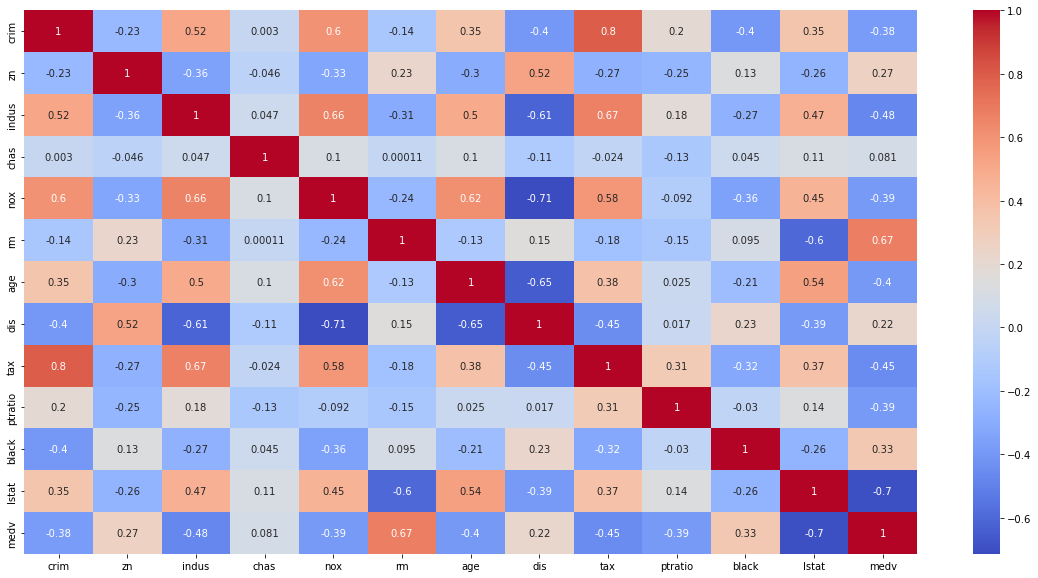

In [25]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')

We see that following columns are highly correlated with our dependent variable 'medv':
1. lstat
2. rm
3. indus
4. tax

We will plot scatterplots for the above mentioned column v/s 'medv'.

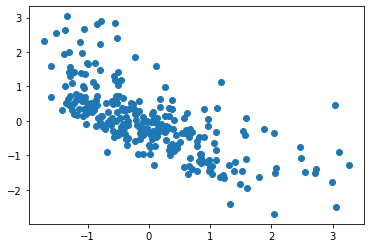

In [26]:
#'lstat' v/s 'medv'
plt.scatter(df['lstat'],df['medv'])
plt.show()

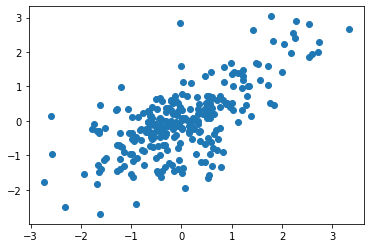

In [27]:
#'rm' v/s 'medv'
plt.scatter(df['rm'],df['medv'])
plt.show()

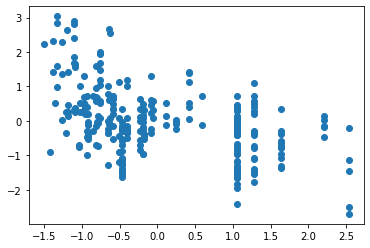

In [28]:
#'indus' v/s 'medv'
plt.scatter(df['indus'],df['medv'])
plt.show()

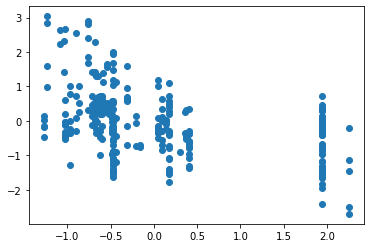

In [29]:
#'tax' v/s 'medv'
plt.scatter(df['tax'],df['medv'])
plt.show()

OLS regression:

'lstat' v/s 'medv'

In [30]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

In [31]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

In [32]:
X = df['lstat']
Y = df['medv']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     254.1
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.30e-40
Time:                        03:44:00   Log-Likelihood:                -290.43
No. Observations:                 268   AIC:                             584.9
Df Residuals:                     266   BIC:                             592.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.95e-16      0.044  -1.36e-14      1.0

In [33]:
X.isna().any()

const    False
lstat    False
dtype: bool

The coefficient on 'lstat' is statistically significant.

The coefficient on 'constant' is statistically insignificant.

In [34]:
x = np.array(df['lstat'])
y = np.array(df['medv'])

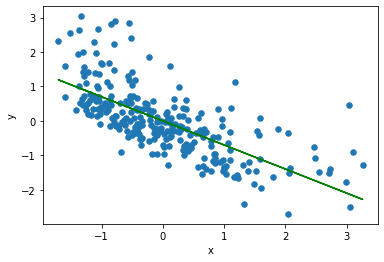

In [35]:
b = estimate_coef(x,y)
plot_regression_line(x,y,b)

'rm' v/s 'medv'

In [36]:
  X = df['rm']
  Y = df['medv']
  X = sm.add_constant(X)
  result = sm.OLS(Y,X).fit()
  print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     221.4
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           7.66e-37
Time:                        03:44:00   Log-Likelihood:                -299.14
No. Observations:                 268   AIC:                             602.3
Df Residuals:                     266   BIC:                             609.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.95e-16      0.045  -1.31e-14      1.0

The coefficient on 'rm' is statistically significant.

The coefficient on 'constant' is statistically insignificant.

In [37]:
x = np.array(df['rm'])
y = np.array(df['medv'])

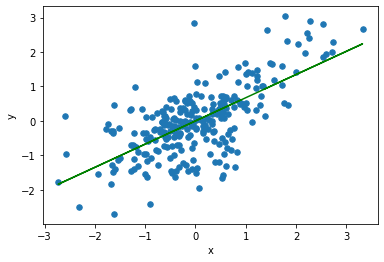

In [38]:
b = estimate_coef(x,y)
plot_regression_line(x,y,b)

'indus' v/s 'medv'

In [39]:
  X = df['indus']
  Y = df['medv']
  X = sm.add_constant(X)
  result = sm.OLS(Y,X).fit()
  print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     78.42
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.21e-16
Time:                        03:44:01   Log-Likelihood:                -345.65
No. Observations:                 268   AIC:                             695.3
Df Residuals:                     266   BIC:                             702.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.95e-16      0.054   -1.1e-14      1.0

The coefficient on 'indus' is statistically significant.

The coefficient on 'constant' is statistically insignificant.

In [40]:
x = np.array(df['indus'])
y = np.array(df['medv'])

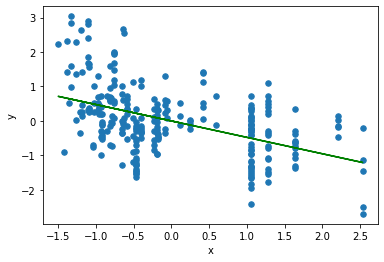

In [41]:
b = estimate_coef(x,y)
plot_regression_line(x,y,b)

'tax' v/s 'medv'

In [42]:
X = df['tax']
Y = df['medv']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     69.21
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           4.65e-15
Time:                        03:44:01   Log-Likelihood:                -349.29
No. Observations:                 268   AIC:                             702.6
Df Residuals:                     266   BIC:                             709.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.95e-16      0.055  -1.09e-14      1.0

The coefficient on 'tax' is statistically significant.

The coefficient on 'constant' is statistically insignificant.

In [43]:
x = np.array(df['tax'])
y = np.array(df['medv'])

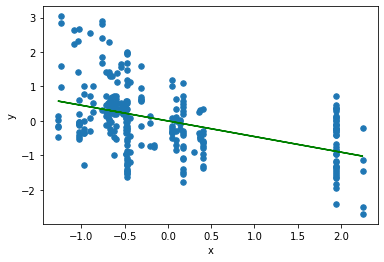

In [44]:
b = estimate_coef(x,y)
plot_regression_line(x,y,b)

'lstat' , 'rm' v/s 'medv'

In [45]:
X = df[['lstat','rm']]
Y = df['medv']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           6.50e-52
Time:                        03:44:01   Log-Likelihood:                -261.08
No. Observations:                 268   AIC:                             528.2
Df Residuals:                     265   BIC:                             538.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.95e-16      0.039  -1.51e-14      1.0

'lstat' , 'rm' , 'indus' v/s ''medv'

In [46]:
X = df[['lstat','rm','indus']]
Y = df['medv']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           2.48e-54
Time:                        03:44:01   Log-Likelihood:                -252.62
No. Observations:                 268   AIC:                             513.2
Df Residuals:                     264   BIC:                             527.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.037e-16      0.038  -1.58e-14      1.0

In [47]:
X = df[['lstat','rm','indus','tax']]
Y = df['medv']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     117.8
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.95e-57
Time:                        03:44:01   Log-Likelihood:                -242.68
No. Observations:                 268   AIC:                             495.4
Df Residuals:                     263   BIC:                             513.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.037e-16      0.037  -1.64e-14      1.0

In [48]:
X = df.drop(columns = 'medv')
Y = df['medv']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     64.66
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           3.45e-70
Time:                        03:44:01   Log-Likelihood:                -193.09
No. Observations:                 268   AIC:                             412.2
Df Residuals:                     255   BIC:                             458.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.037e-16      0.031  -1.94e-14      1.0